**Библиотеки Python для DS (семинары в записи)**

Урок 8. На практике использование методов генерации признаков

В вашем распоряжении набор данных о качестве сна Sleep_health_and_lifestyle_dataset.csv.
Ваша задача — подготовить данные к моделированию, сгенерировать новые признаки, применить методы отбора признаков для улучшения качества предсказательной модели и подобрать оптимальные гиперпараметры для модели регрессии.

1. Предобработка данных:
— Очистите данные от пропусков и аномалий.
— Преобразуйте категориальные переменные с помощью One-Hot Encoding или Label Encoding.

2. Генерация новых признаков:
— Создайте комбинированные признаки, которые могут помочь улучшить модель.
— Используйте полиномиальные признаки для числовых переменных.

3. Отбор признаков:
— Примените несколько методов отбора признаков (например, RFE, SelectKBest).
— Сравните качество модели до и после отбора признаков.

4. Подбор гиперпараметров:
— Используйте GridSearchCV или RandomizedSearchCV для настройки параметров вашей модели регрессии.
— Оцените, как изменение гиперпараметров влияет на качество предсказаний.

In [50]:
# Библиотеки для работы с датасетом и графиками
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.metrics import r2_score, accuracy_score, classification_report

In [51]:
# Загружаем датасет
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

**1. Предобработка данных:**
* Очистите данные от пропусков и аномалий.
* Преобразуйте категориальные переменные с помощью One-Hot Encoding или Label Encoding.

In [52]:
# Выводим дата фрейм
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Этот фрейм данных содержит следующие столбцы:

1. Person ID (Идентификатор для каждого человека)
2. Gender (Пол человека (мужчина/женщина))
3. Age (Возраст человека в годах)
4. Occupation (Род занятий или профессия человека)
5. Sleep Duration (hours) (Количество часов, которые человек спит в сутки)
6. Quality of Sleep (scale: 1-10) (Субъективная оценка качества сна в диапазоне от 1 до 10)
7. Physical Activity Level (minutes/day) (Количество минут, которые человек ежедневно уделяет физической активности)
8. Stress Level (scale: 1-10) (Субъективная оценка уровня стресса, испытываемого человеком, в диапазоне от 1 до 10)
9. BMI Category (Категория ИМТ человека (например, недостаточный вес, нормальный, избыточный вес с избыточной массой тела))
10. Blood Pressure (systolic/diastolic) (Измерение артериального давления человека, показывающее превышение систолического давления над диастолическим давлением)
11. Heart Rate (bpm) (Частота сердечных сокращений человека в состоянии покоя в ударах в минуту)
12. Daily Steps (Количество шагов, которые человек делает за день)
13. Sleep Disorder (Наличие или отсутствие у человека нарушений сна (отсутствие таковых, бессонница, апноэ во сне))

In [53]:
# Выводим общую информацию
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Из общей информации следует:
1. Всего 13 колонок, DataFrame содержит 374 записи, от 0 до 373
2. Нулевые значения отсуствуют
3. Есть пропущеные записи в колонке Sleep Disorder
4. Колонки: Person ID, Age, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps находятся в целочисленых значениях int64
5. Колонки: Sleep Duration находится в дробном формате float64
6. Колонки: Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder являются объектами object

In [54]:
# Статистический анализ числовых переменных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

1. Age (Возраст человека в годах):
- Средний возраст человека на уровне 43.00
- Миниманая 27.00
- Максимальная 59.00
- Медиана равна 42.18
- Отклонение состовляет 8.67
2. Sleep Duration (hours) (Количество часов, которые человек спит в сутки):
- Средние количество часов которое человек спит в сутки на уровне 7.20
- Миниманая 5.80
- Максимальная 8.50
- Медиана равна 7.13
- Отклонение состовляет 0.79
3. Quality of Sleep (scale: 1-10) (Субъективная оценка качества сна в диапазоне от 1 до 10):
- Средняя оценка качества сна на уровне 7.00
- Миниманая 4.00
- Максимальная 9.00
- Медиана равна 7.31
- Отклонение состовляет 1.19
4. Physical Activity Level (minutes/day) (Количество минут, которые человек ежедневно уделяет физической активности):
- Средние количество минут которые человек ежедневно уделяет физической активности на уровне 60.00
- Миниманая 30.00
- Максимальная 90.00
- Медиана равна 59.17
- Отклонение состовляет 20.83
5. Stress Level (scale: 1-10) (Субъективная оценка уровня стресса, испытываемого человеком, в диапазоне от 1 до 10):
- Средние субъективная оценка уровня стреса на уровне 5.00
- Миниманая 3.00
- Максимальная 8.00
- Медиана равна 5.38
- Отклонение состовляет 5.38
6. Heart Rate (bpm) (Частота сердечных сокращений человека в состоянии покоя в ударах в минуту):
- Средняя частота сердечных сокращений на уровне 70.00
- Миниманая 65.00
- Максимальная 86.00
- Медиана равна 70.16
- Отклонение состовляет 4.13
7. Daily Steps (Количество шагов, которые человек делает за день):
- Средние количество шагов на уровне 7000.00
- Миниманая 3000.00
- Максимальная 10000.00
- Медиана равна 6816.84
- Отклонение состовляет 1617.91

In [55]:
# Статистический анализ объектных признаков
df.describe(include='object').T

,count,unique,top,freq
Gender,374,2,Male,189
Occupation,374,11,Nurse,73
BMI Category,374,4,Normal,195
Blood Pressure,374,25,130/85,99
Sleep Disorder,155,2,Sleep Apnea,78


1. Gender (Пол человека (мужчина/женщина)):
- В данных присутствуют записи о поле у 374 индивидов.
- Имеются всего две уникальные категории пола.
- Наиболее часто встречающийся пол - Мужчина (Male), с частотой 189 раз.

2. Occupation (Род занятий или профессия человека)
- Для 374 индивидов имеются данные о профессии.
- В данных присутствует 11 уникальных профессий.
- Профессия 'Nurse' (Медсестра/Медбрат) встречается чаще всего - 73 раза.

3. BMI Category (Категория ИМТ человека (например, недостаточный вес, нормальный, избыточный вес с избыточной массой тела))
- Информация о категории индекса массы тела (ИМТ) присутствует для всех 374 индивидов.
- Обнаружено 4 уникальные категории ИМТ.
- Наиболее распространенная категория ИМТ - 'Normal' (Норма), встречается 195 раз.

4. Blood Pressure (systolic/diastolic) (Измерение артериального давления человека, показывающее превышение систолического давления над диастолическим давлением)
- Записи об артериальном давлении имеются для каждого из 374 индивидов.
- Выявлено 25 различных значений артериального давления.
- Самый распространенный уровень артериального давления среди участников - 130/85, зафиксирован 99 раз.

5. Sleep Disorder (Наличие или отсутствие у человека нарушений сна (отсутствие таковых, бессонница, апноэ во сне))
- Информация о соновых расстройствах есть для всех 374 индивидов.
- В данных есть 3 уникальных состояния соновых расстройств.
- Наиболее частая запись - 'No Disorder' (Нет расстройства), она встречается в 219 случаях


In [56]:
# Проверяем на дубликаты
print("Количество дубликатов:")
print(df.duplicated().sum())

Количество дубликатов:
0


Дубликаты отсутствуют.

In [64]:
# Проверка на пропущенные значения
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [15]:
# Проверка на NaN значения
df.isnull().any().any()

True

По итогу проверок на NaN значения, пропущеные значения находим 219 пропущеных NaN значений.

In [58]:
# Заменяем пропущенные (NaN) значения.
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [59]:
# Проверка на NaN значения
df.isnull().any().any()

False

Получаем отсуствие пропущеных NaN значений

In [65]:
# Анализ категориальных данных
print(df['Gender'].value_counts())
print(df['BMI Category'].value_counts())
print(df['Occupation'].value_counts())
print(df['Blood Pressure'].value_counts())
print(df['Sleep Disorder'].value_counts())

Gender
Male      189
Female    185
Name: count, dtype: int64
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64
Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [67]:
# Создание копии датафрейма
df_encoder = df.copy()

In [68]:
# Label Encoding для столбцов
label_encoder = LabelEncoder()
df_encoder['Gender'] = label_encoder.fit_transform(df_encoder['Gender'])
df_encoder['BMI_Category'] = label_encoder.fit_transform(df_encoder['BMI Category'])

# Задание маппинга для 'Sleep Disorder'
sleep_disorder_mapping = {'No Disorder': 0, 'Insomnia': 1, 'Sleep Apnea': 2}
df_encoder['Sleep_Disorder'] = df_encoder['Sleep Disorder'].map(sleep_disorder_mapping)

# Удаление оригинальных категориальных столбцов
df_encoder.drop(['BMI Category', 'Sleep Disorder'], axis=1, inplace=True)

# Проверяем результат кодирования
print("\nDataFrame после Label Encoding:")
print(df_encoder)



DataFrame после Label Encoding:
     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1       1   27     Software Engineer             6.1   
1            2       1   28                Doctor             6.2   
2            3       1   28                Doctor             6.2   
3            4       1   28  Sales Representative             5.9   
4            5       1   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370       0   59                 Nurse             8.1   
370        371       0   59                 Nurse             8.0   
371        372       0   59                 Nurse             8.1   
372        373       0   59                 Nurse             8.1   
373        374       0   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level Blood Pressure  \
0                   6                       42             

In [69]:
# Преобразование текста в TF-IDF векторы
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Occupation'])

# Создание DataFrame из TF-IDF матрицы
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Объединение с основным DataFrame и удаление текстового столбца
df_encoder = pd.concat([df_encoder, tfidf_df], axis=1).drop('Occupation', axis=1)

# Извлечение систолического и диастолического давления из строки
df_encoder['Systolic_Pressure'] = df_encoder['Blood Pressure'].str.split('/').str[0].astype(float)
df_encoder['Diastolic_Pressure'] = df_encoder['Blood Pressure'].str.split('/').str[1].astype(float)

# Удаляем оригинальный столбец Blood Pressure
df_encoder.drop(columns=['Blood Pressure'], inplace=True)

# Проверяем результирующий DataFrame
print(df_encoder)

     Person ID  Gender  Age  Sleep Duration  Quality of Sleep  \
0            1       1   27             6.1                 6   
1            2       1   28             6.2                 6   
2            3       1   28             6.2                 6   
3            4       1   28             5.9                 4   
4            5       1   28             5.9                 4   
..         ...     ...  ...             ...               ...   
369        370       0   59             8.1                 9   
370        371       0   59             8.0                 9   
371        372       0   59             8.1                 9   
372        373       0   59             8.1                 9   
373        374       0   59             8.1                 9   

     Physical Activity Level  Stress Level  Heart Rate  Daily Steps  \
0                         42             6          77         4200   
1                         60             8          75        10000   
2     

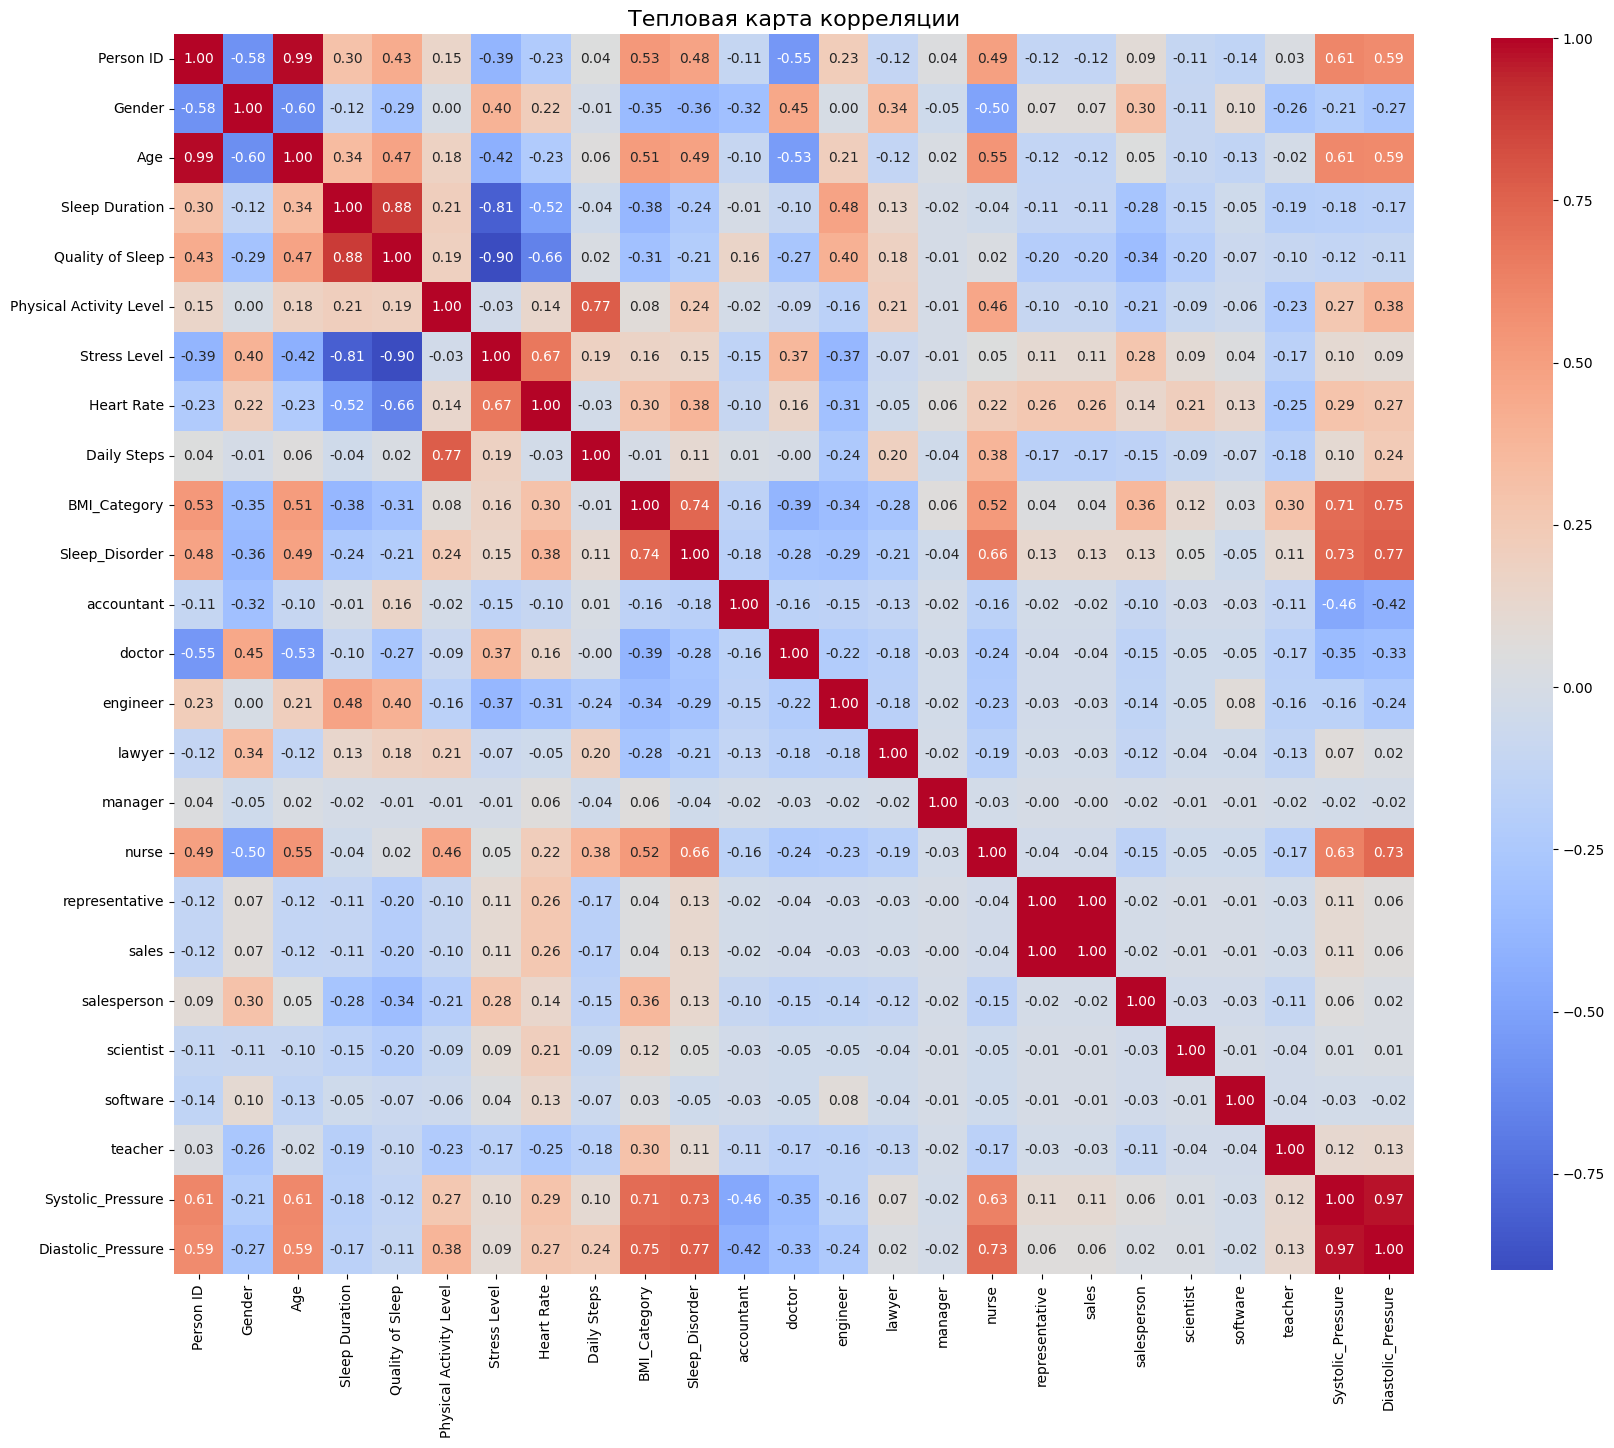

In [71]:
# Построение тепловой карты корреляций
correlation_matrix = df_encoder.corr()

# Настройка размера графика
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Тепловая карта корреляции', fontsize=16)
plt.show()



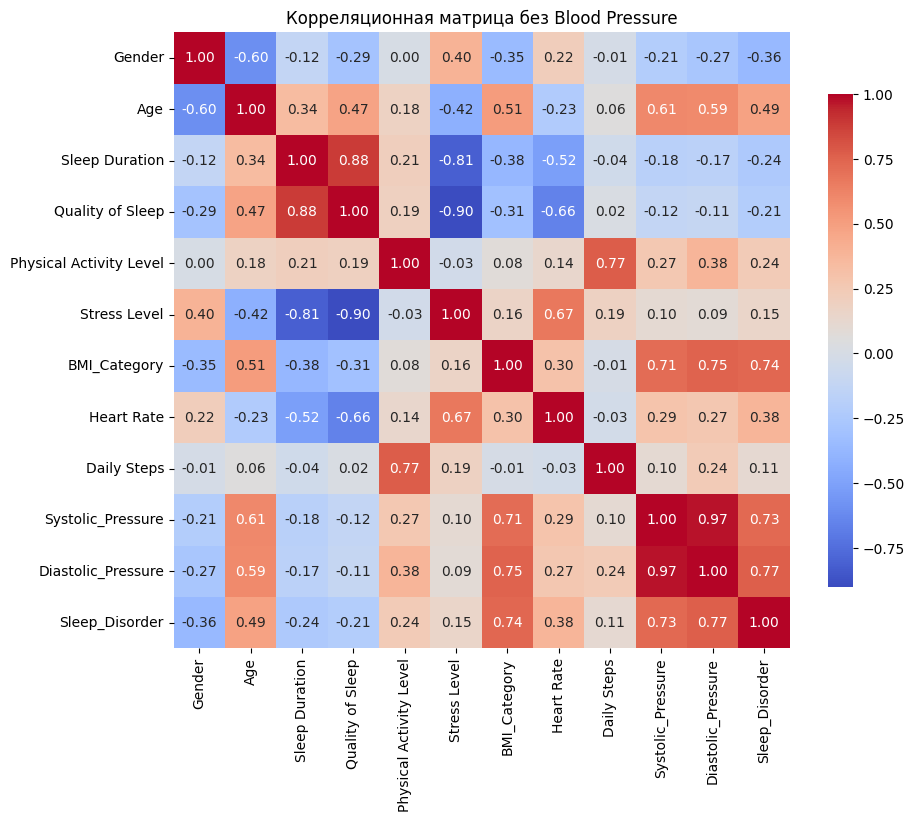

In [72]:
# Визуализация распределения некоторых числовых переменных
selected_columns = ['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                    'Stress Level', 'BMI_Category', 'Heart Rate', 'Daily Steps', 'Systolic_Pressure',
                    'Diastolic_Pressure', 'Sleep_Disorder']

# Построение корреляционной матрицы для выбранных столбцов
correlation_matrix = df_encoder[selected_columns].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица без Blood Pressure')
plt.show()

**2. Генерация новых признаков:**

* Создайте комбинированные признаки, которые могут помочь улучшить модель.

* Используйте полиномиальные признаки для числовых переменных.

In [36]:
# Создаём комбинированные признаки
df_encoder['Sleep_Quality'] = df_encoder['Sleep Duration'] * df_encoder['Quality of Sleep']
df_encoder['Age_Stress'] = df_encoder['Age'] + df_encoder['Stress Level']
df_encoder['Sleep_Activity_Ratio'] = df_encoder['Daily Steps'] / df_encoder['Physical Activity Level']

In [37]:
df_encoder

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI_Category,...,sales,salesperson,scientist,software,teacher,Systolic_Pressure,Diastolic_Pressure,Sleep_Quality,Age_Stress,Sleep_Activity_Ratio
0,1,1,27,6.1,6,42,6,77,4200,3,...,0.000000,0.0,0.0,0.891141,0.0,126.0,83.0,36.6,33,100.000000
1,2,1,28,6.2,6,60,8,75,10000,0,...,0.000000,0.0,0.0,0.000000,0.0,125.0,80.0,37.2,36,166.666667
2,3,1,28,6.2,6,60,8,75,10000,0,...,0.000000,0.0,0.0,0.000000,0.0,125.0,80.0,37.2,36,166.666667
3,4,1,28,5.9,4,30,8,85,3000,2,...,0.707107,0.0,0.0,0.000000,0.0,140.0,90.0,23.6,36,100.000000
4,5,1,28,5.9,4,30,8,85,3000,2,...,0.707107,0.0,0.0,0.000000,0.0,140.0,90.0,23.6,36,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,8.1,9,75,3,68,7000,3,...,0.000000,0.0,0.0,0.000000,0.0,140.0,95.0,72.9,62,93.333333
370,371,0,59,8.0,9,75,3,68,7000,3,...,0.000000,0.0,0.0,0.000000,0.0,140.0,95.0,72.0,62,93.333333
371,372,0,59,8.1,9,75,3,68,7000,3,...,0.000000,0.0,0.0,0.000000,0.0,140.0,95.0,72.9,62,93.333333
372,373,0,59,8.1,9,75,3,68,7000,3,...,0.000000,0.0,0.0,0.000000,0.0,140.0,95.0,72.9,62,93.333333



Новый признак Sleep_Quality: произведение Sleep Duration и Quality of Sleep, должен помочь модели лучше понять, как качество сна зависит от его продолжительности.

Новый признак Age_Stress: сумма Age и Stress Level. должен помочь модели лучше выявить, как возраст и уровень стресса взаимосвязаны (хотя логически уровень стресса с возрастом повышается тепловая карта показывает отсуствие связи).

Новый признак Sleep_Activity_Ratio: отношение Daily Steps к Physical Activity Level возможно может показать, насколько активен человек по сравнению с его уровнем физической активности.

In [38]:
# Выбираем числовые признаки для полиномиальных признаков
numerical_features = df_encoder.select_dtypes(include=['float64', 'int']).columns.tolist()

# Создаём полиномиальные признаки
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_encoder[numerical_features])

# Создаём DataFrame из полиномиальных признаков
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features))

# Объединяем оригинальный DataFrame с новым DataFrame полиномиальных признаков
df_combined = pd.concat([df_encoder.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)

# Выводим итоговый DataFrame
df_combined

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI_Category,...,Diastolic_Pressure^2,Diastolic_Pressure Sleep_Quality,Diastolic_Pressure Age_Stress,Diastolic_Pressure Sleep_Activity_Ratio,Sleep_Quality^2,Sleep_Quality Age_Stress,Sleep_Quality Sleep_Activity_Ratio,Age_Stress^2,Age_Stress Sleep_Activity_Ratio,Sleep_Activity_Ratio^2
0,1,1,27,6.1,6,42,6,77,4200,3,...,6889.0,3037.8,2739.0,8300.000000,1339.56,1207.8,3660.0,1089.0,3300.000000,10000.000000
1,2,1,28,6.2,6,60,8,75,10000,0,...,6400.0,2976.0,2880.0,13333.333333,1383.84,1339.2,6200.0,1296.0,6000.000000,27777.777778
2,3,1,28,6.2,6,60,8,75,10000,0,...,6400.0,2976.0,2880.0,13333.333333,1383.84,1339.2,6200.0,1296.0,6000.000000,27777.777778
3,4,1,28,5.9,4,30,8,85,3000,2,...,8100.0,2124.0,3240.0,9000.000000,556.96,849.6,2360.0,1296.0,3600.000000,10000.000000
4,5,1,28,5.9,4,30,8,85,3000,2,...,8100.0,2124.0,3240.0,9000.000000,556.96,849.6,2360.0,1296.0,3600.000000,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,8.1,9,75,3,68,7000,3,...,9025.0,6925.5,5890.0,8866.666667,5314.41,4519.8,6804.0,3844.0,5786.666667,8711.111111
370,371,0,59,8.0,9,75,3,68,7000,3,...,9025.0,6840.0,5890.0,8866.666667,5184.00,4464.0,6720.0,3844.0,5786.666667,8711.111111
371,372,0,59,8.1,9,75,3,68,7000,3,...,9025.0,6925.5,5890.0,8866.666667,5314.41,4519.8,6804.0,3844.0,5786.666667,8711.111111
372,373,0,59,8.1,9,75,3,68,7000,3,...,9025.0,6925.5,5890.0,8866.666667,5314.41,4519.8,6804.0,3844.0,5786.666667,8711.111111


**3. Отбор признаков:**

* Примените несколько методов отбора признаков (например, RFE, SelectKBest).

* Сравните качество модели до и после отбора признаков.

In [39]:
# Разделение данных на признаки и целевую переменную
# Извлечём diagnosis из признаков
X = df_encoder.drop('Sleep_Disorder', axis=1)
# Определим целевую переменную
y = df_encoder['Sleep_Disorder']

In [40]:
# Стандартизация данных
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Создание нового DataFrame со стандартизированными данными
df_scaled = pd.DataFrame(X_scaler, columns=X.columns)

In [41]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (299, 27)
Размер тестового набора: (75, 27)


In [42]:
# Обучение модели до отбора признаков
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred)
print(f'Точность до отбора: {accuracy_before:.4f}')
print(f'R2 на тренировочных данных {r2_score(y_train, model.predict(X_train))}')
print(f'R2 на тестовых данных {r2_score(y_test, model.predict(X_test))}')

Точность до отбора: 0.8933
R2 на тренировочных данных 0.7583983770587629
R2 на тестовых данных 0.7767857142857143


In [43]:
# Обучение RFE
# n_features_to_select - количество признаков, которые нужно выбрать
selector_rfe = RFE(model, n_features_to_select=14)
selector_rfe.fit(X_train, y_train)

# Показываем какие признаки выбраны
selected_features_rfe = pd.DataFrame({
    # Здесь X.columns должен содержать названия столбцов, использованных для X
    'Feature': X.columns,
    'Ranking': selector_rfe.ranking_
})

print(selected_features_rfe.sort_values(by='Ranking', ascending=False))
print("Признаки, выбранные с помощью RFE:")
print(selected_features_rfe[selected_features_rfe['Ranking'] == 1])

# Разделение на обучающую и тестовую выборки с учётом отобраных признаков
# Данный кусочек кода учитывает именно те признаки которые считает важными RFE
top_features_rfe = selected_features_rfe[selected_features_rfe['Ranking'] == 1]['Feature'].values
X_train_selected_rfe = X_train[top_features_rfe]
X_test_selected_rfe = X_test[top_features_rfe]
# Данный кусочек кода позволяет в ручную выбирать признаки однако это может привести к неточности и выбору лишних признаков
# top_features_rfe = selected_features_rfe.sort_values(by='Ranking', ascending=False)[:14]
# X_train_selected_rfe = X_train[top_features_rfe.Feature]
# X_test_selected_rfe = X_test[top_features_rfe.Feature]

# Обучение модели после RFE
model.fit(X_train_selected_rfe, y_train)
y_pred_rfe = model.predict(X_test_selected_rfe)
accuracy_after_rfe = accuracy_score(y_test, y_pred_rfe)
print(f'Точность RFE: {accuracy_after_rfe:.4f}')
print(f'R2 на тренировочных данных {r2_score(y_train, model.predict(X_train_selected_rfe))}')
print(f'R2 на тестовых данных {r2_score(y_test, model.predict(X_test_selected_rfe))}')

                    Feature  Ranking
1                    Gender       14
20                 software       13
14                  manager       12
2                       Age       11
0                 Person ID       10
13                   lawyer        9
6              Stress Level        8
17                    sales        7
5   Physical Activity Level        6
25               Age_Stress        5
4          Quality of Sleep        4
19                scientist        3
11                   doctor        2
24            Sleep_Quality        1
23       Diastolic_Pressure        1
22        Systolic_Pressure        1
21                  teacher        1
3            Sleep Duration        1
16           representative        1
18              salesperson        1
7                Heart Rate        1
15                    nurse        1
12                 engineer        1
10               accountant        1
9              BMI_Category        1
8               Daily Steps        1
2

In [44]:
# Обучение SelectKBest
# k - количество признаков, которые нужно выбрать
k = 14
selector_SB = SelectKBest(score_func=f_classif, k=k)
selector_SB.fit(X_train, y_train)


# Получаем оценки признаков
scores = selector_SB.scores_

# Создаем DataFrame для выбранных признаков и их оценок
selected_features_SB = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores
})

# Сортируем по убыванию оценок
print(selected_features_SB.sort_values(by='Score', ascending=False))
print("Признаки, выбранные с помощью SelectKBest:")
print(selected_features_SB.nlargest(k, 'Score'))

# Разделение на обучающую и тестовую выборки с учётом отобранных признаков
# Данный кусочек кода учитывает именно те признаки которые считает важными SelectKBest
top_features_SB = selected_features_SB.nlargest(k, 'Score')['Feature'].values
X_train_selected_SB = X_train[top_features_SB]
X_test_selected_SB = X_test[top_features_SB]
# Данный кусочек кода позволяет в ручную выбирать признаки однако это может привести к неточности и выбору лишних признаков
# top_features_SB = selected_features_SB.sort_values(by='Score', ascending=False)[:14]
# X_train_selected_SB = X_train[top_features_SB.Feature]
# X_test_selected_SB = X_test[top_features_SB.Feature]

# Обучение модели после SelectKBest
model.fit(X_train_selected_SB, y_train)
y_pred_kbest = model.predict(X_test_selected_SB)
accuracy_after_kbest = accuracy_score(y_test, y_pred_kbest)
print(f'Точность SelectKBest: {accuracy_after_kbest:.4f}')
print(f'R2 на тренировочных данных {r2_score(y_train, model.predict(X_train_selected_SB))}')
print(f'R2 на тестовых данных {r2_score(y_test, model.predict(X_test_selected_SB))}')

                    Feature       Score
9              BMI_Category  245.918848
23       Diastolic_Pressure  208.865563
15                    nurse  208.604969
22        Systolic_Pressure  166.372227
25               Age_Stress   69.644308
18              salesperson   56.298470
2                       Age   47.690662
0                 Person ID   43.919251
5   Physical Activity Level   37.914670
21                  teacher   31.893035
8               Daily Steps   27.669634
3            Sleep Duration   27.083285
24            Sleep_Quality   25.773762
7                Heart Rate   25.562795
1                    Gender   24.618252
4          Quality of Sleep   23.142246
12                 engineer   16.077377
26     Sleep_Activity_Ratio   11.366021
11                   doctor   11.066472
13                   lawyer    9.631215
6              Stress Level    6.367336
10               accountant    6.077487
17                    sales    1.923132
16           representative    1.923132


Результаты:

До отбора признаков:

Точность до отбора: 0.8933
R2 на тренировочных данных 0.7583983770587629
R2 на тестовых данных 0.7767857142857143

Отбор признаков с помощью RFE:

Точность RFE: 0.8933
R2 на тренировочных данных 0.7326960767458652
R2 на тестовых данных 0.7159090909090909

Отбор признаков с помощью SelectKBest:

Точность SelectKBest: 0.9067
R2 на тренировочных данных 0.7224151566207062
R2 на тестовых данных 0.7362012987012987

Модель без отбора признаков и модель RFE показали одинаковую точность 0.89, а SelectKBest показала более высокую точность 0.90

R2 на тренировочных данных модель без отбора признаков имеет наибольший результат в 0.75 в то время как RFE 0.73 и SelectKBest 0.72 это может указывать на то, что отбор признаков может привести к некоторой потере информации на тренировочных данных.

R2 на тестовых данных модель без отобра признаков показала 0.77, что является лучшим результатом по сравнению с RFE 0.71 и SelectKBest 0.73, это может указывать на то что модели с отбором признаков так же теряют часть информации при обощении данных.

Среди моделей с отбором признаков SelectKBest оказалась наиболее эффективной в плане точности и обобщающей способности на тестовых данных, несмотря на более низские значения на тренировочных данных R2 по сравнению с RFE которая показала стабильные результаты по точности но не смогла улучшить метрики по сравнению с можелью без отбора признаков.

Вывод: метод SelectKBest в данном случае оказался более эффективным для улучшения качества модели по сравнению с RFE учитывая отбор признаков, а модель без отбора признаков оказалась лучше моделей с отбором признаков во всем кроме точности с не такой уж и большой разницей.

**4. Подбор гиперпараметров:**

* Используйте GridSearchCV или RandomizedSearchCV для настройки параметров вашей модели регрессии.

* Оцените, как изменение гиперпараметров влияет на качество предсказаний.

In [45]:
# Определение параметров для GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Регуляризация
    'penalty': ['l1', 'l2'],        # Тип регуляризации
    'solver': ['liblinear', 'saga'],  # Алгоритмы оптимизации
    'max_iter': [100, 200, 300]     # Максимальное количество итераций
}

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Обучение модели с использованием GridSearchCV
grid_search.fit(X_train, y_train)

# Получение лучших параметров
best_params = grid_search.best_params_
print("Лучшие гиперпараметры (Grid Search):", best_params)
print(f"Лучшая оценка (Grid Search): {grid_search.best_score_:.2f}")

# Оценка модели с лучшими параметрами
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Оценка качества предсказаний
accuracy = accuracy_score(y_test, y_pred)
print(f'GridSearchCV точность на тестовых данных до отбора признаков: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Лучшие гиперпараметры (Grid Search): {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Лучшая оценка (Grid Search): 0.91
GridSearchCV точность на тестовых данных до отбора признаков: 0.8800
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.70      0.88      0.78        16
           2       0.92      0.69      0.79        16

    accuracy                           0.88        75
   macro avg       0.86      0.84      0.84        75
weighted avg       0.89      0.88      0.88        75



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [46]:
# Определение параметров для GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Регуляризация
    'penalty': ['l1', 'l2'],        # Тип регуляризации
    'solver': ['liblinear', 'saga'],  # Алгоритмы оптимизации
    'max_iter': [100, 200, 300]     # Максимальное количество итераций
}

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Обучение модели с использованием GridSearchCV
grid_search.fit(X_train_selected_SB, y_train)

# Получение лучших параметров
best_params = grid_search.best_params_
print("Лучшие гиперпараметры (Grid Search):", best_params)
print(f"Лучшая оценка (Grid Search): {grid_search.best_score_:.2f}")

# Оценка модели с лучшими параметрами
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected_SB)

# Оценка качества предсказаний
accuracy = accuracy_score(y_test, y_pred)
print(f'GridSearchCV точность на тестовых данных до отбора признаков: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Лучшие гиперпараметры (Grid Search): {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Лучшая оценка (Grid Search): 0.91
GridSearchCV точность на тестовых данных до отбора признаков: 0.9200
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.82      0.88      0.85        16
           2       0.93      0.81      0.87        16

    accuracy                           0.92        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.92      0.92      0.92        75



In [47]:
# Определение параметров для RandomizedSearchCV
param_distributions = {
    'C': [0.01, 0.1, 1, 10, 100],  # Регуляризация
    'penalty': ['l1', 'l2'],        # Тип регуляризации
    'solver': ['liblinear', 'saga'],  # Алгоритмы оптимизации
    'max_iter': [100, 200, 300]     # Максимальное количество итераций
}

# Настройка RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, scoring='accuracy', n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Обучение модели с использованием RandomizedSearchCV
random_search.fit(X_train, y_train)

# Получение лучших параметров
best_params = random_search.best_params_
print("Лучшие гиперпараметры (Random Search):", best_params)
print(f"Лучшая оценка (Random Search): {random_search.best_score_:.2f}")

# Оценка модели с лучшими параметрами
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Оценка качества предсказаний
accuracy = accuracy_score(y_test, y_pred)
print(f'RandomizedSearchCV точность на тестовых данных для SelectKBest: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие гиперпараметры (Random Search): {'solver': 'saga', 'penalty': 'l1', 'max_iter': 300, 'C': 1}
Лучшая оценка (Random Search): 0.91
RandomizedSearchCV точность на тестовых данных для SelectKBest: 0.8800
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.70      0.88      0.78        16
           2       0.92      0.75      0.83        16

    accuracy                           0.88        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.88      0.88        75



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [48]:
# Определение параметров для RandomizedSearchCV
param_distributions = {
    'C': [0.01, 0.1, 1, 10, 100],  # Регуляризация
    'penalty': ['l1', 'l2'],        # Тип регуляризации
    'solver': ['liblinear', 'saga'],  # Алгоритмы оптимизации
    'max_iter': [100, 200, 300]     # Максимальное количество итераций
}

# Настройка RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, scoring='accuracy', n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Обучение модели с использованием RandomizedSearchCV
random_search.fit(X_train_selected_SB, y_train)

# Получение лучших параметров
best_params = random_search.best_params_
print("Лучшие гиперпараметры (Random Search):", best_params)
print(f"Лучшая оценка (Random Search): {random_search.best_score_:.2f}")

# Оценка модели с лучшими параметрами
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_selected_SB)

# Оценка качества предсказаний
accuracy = accuracy_score(y_test, y_pred)
print(f'RandomizedSearchCV точность на тестовых данных для SelectKBest: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие гиперпараметры (Random Search): {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 10}
Лучшая оценка (Random Search): 0.91
RandomizedSearchCV точность на тестовых данных для SelectKBest: 0.9200
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.82      0.88      0.85        16
           2       0.93      0.81      0.87        16

    accuracy                           0.92        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.92      0.92      0.92        75



Регуляризации C и выбор типа регуляризации penalty оказали заметное влияние на точность и метрики классов.